### Objective : In this notebook we will import Glove Vectors of 100 dimensions and visalize them in two dimensions

        1. We will download the 100 dimension glove vector form the web
        2. Load it in word 2 vec format using NLTK
        3. Perform few similarity & dissimilarity functions on it
        4. Finally visualize it with help of TSNE - T distributed Stochastic Neighbour Embedding

In [67]:
#### Load all the required packages 
import nltk
from gensim.test.utils import datapath, get_tmpfile 
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import os
import numpy 
from sklearn.decomposition import PCA

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [20]:
### Define a funtion to read glove tet file, convert it to word2 vec format and load it as Keyed Vector using Gensim
def load_glove(path,filename):
    ''' This function takes 2 arguments : 
    path : the loation where glove text file is placed
    filename : the name of the glove text file
    return : The model which can be used further'''

    ### Datapath help used to define the path where the corpus is place
    glove_file = datapath(os.path.join(path,filename))
    ### Use go create the file with defined name, it is temporary file
    tmp_file = get_tmpfile("test_word2vec.txt")
    ### It convert the Glove vector format to word 2 vector output format
    _ = glove2word2vec(glove_file, tmp_file)
    ### Keyed vectors allows to perform various function such as vetor locckup, similarity etc
    a = KeyedVectors.load_word2vec_format(tmp_file)
    print (" The Glove vectors have been loaded succesfully")
    return (a)

In [21]:
model = load_glove("C:\\Users\\ash\\Desktop\\NLP-DL\\glove6b100dtxt",'glove.6B.100d.txt')

C:\Users\ash\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


 The Glove vectors have been loaded succesfully


### As glove vector are based on distributional semantics. It allows to understand words in more details. We can do a host of functions on the words

        1. Understanding which words are similar to given words
        2. Finding odd one out in given list of words
        3. Calculating the Analogy relatiship between variables

### For example similar words to tropical fruits mango are all other tropical fruits

In [27]:
#### Print the most similar words to mango
model.most_similar("mango")

[('papaya', 0.8455769419670105),
 ('pineapple', 0.8291023969650269),
 ('guava', 0.8188869953155518),
 ('avocado', 0.785765528678894),
 ('coconut', 0.765885591506958),
 ('pear', 0.7619122266769409),
 ('apricot', 0.749144971370697),
 ('peach', 0.7421489953994751),
 ('tomato', 0.730752170085907),
 ('citrus', 0.7271271347999573)]

### Similar words to google are all companies related to tech

In [28]:
#### Print the most similar words to google
model.most_similar("google")

[('yahoo', 0.8637359142303467),
 ('microsoft', 0.8104098439216614),
 ('web', 0.7629812955856323),
 ('aol', 0.7571687698364258),
 ('facebook', 0.7516582012176514),
 ('internet', 0.738322377204895),
 ('ebay', 0.7163310647010803),
 ('netscape', 0.7149453163146973),
 ('msn', 0.7122776508331299),
 ('online', 0.6866507530212402)]

### We can also calculate interesting analogies for example king - man + woman gives queen.
<img src="word2vec.png">

In [42]:
### Print we will define a function which help us to achive it
def analogy(word1,word2,word3):
    '''
    It takes 3 arguments. Word1 and word2 which are to be subtracted and word3 which should be added.
    It return the word which is closet after thet
    '''
    print (" The most similar word to above analogy is")
    return (model.most_similar(positive =[word1,word3],negative = [word2],topn =1 ))
    

In [43]:
analogy('king','man','woman')

 The most similar word to above analogy is


[('queen', 0.7698541283607483)]

In [50]:
### Works very well with capital and city names also
analogy('munich','germany','india')

 The most similar word to above analogy is


[('delhi', 0.7660425901412964)]

### Word 2 Vectors are not completly correct they can also give differnt uderstanding
###### Finding closest person to hitler in india gave gandhi, which makes no sense

In [51]:
analogy('adolf','germany','india')

 The most similar word to above analogy is


[('gandhi', 0.629203200340271)]

In [92]:
### Lets define a function which helps up visualize the word 2 vectors

def vec_vis(model,word_list,sample_size):
    ''' Takes the model names & a sample size and return the png file'''
    if len(word_list) == 0: 
        if sample_size > 10:
            words = np.random.choice(list(model.vocab.keys()),sample_size)
        else:
            print ("Please enter bigger smaple size")
    else:
        words = word_list
    
    word_vector = np.array([model[w] for w in words])
    
    ### Trasnform the PCA from 100 dimension to two dimensions
    two_dim = PCA().fit_transform(word_vector)[:,:2]
    
    ### Now we will fit the data on two diemnsional dataset
    plt.figure(figsize = (8,8))
    plt.scatter(two_dim[:,0],two_dim[:,1],edgecolors = 'k',c = 'r')
    for word, (x,y) in zip(words, two_dim):
        plt.text(x+0.05,y+0.05,word)

<IPython.core.display.Javascript object>


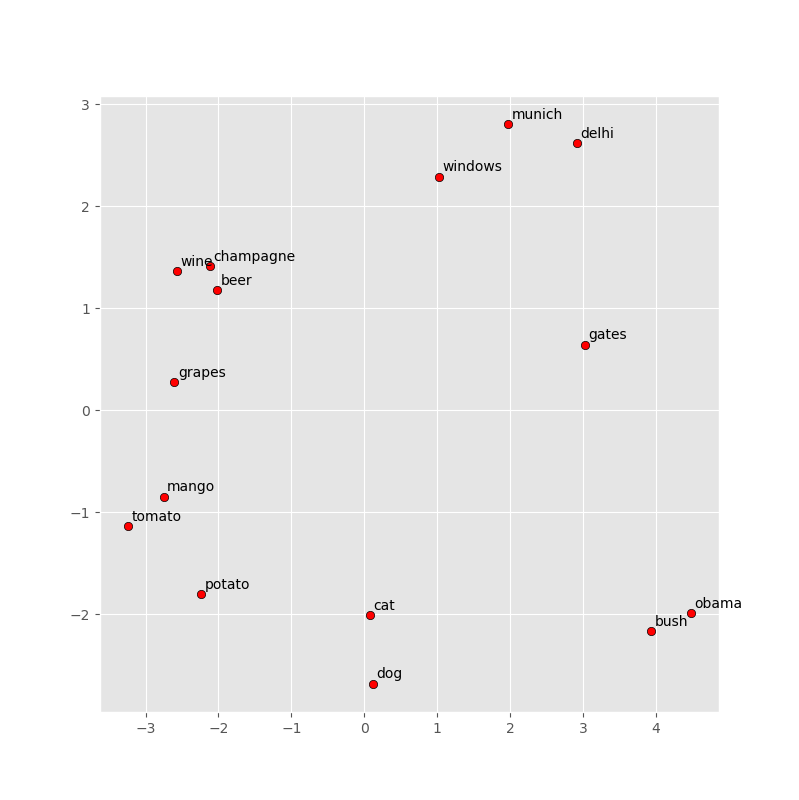

In [95]:
vec_vis(model,['beer','wine','mango','grapes','potato','tomato','champagne','gates','bush','windows','obama','munich','delhi','cat','dog'],310)